## Set your random seed to 1234

In [3]:
import random
random.seed(1234)

## Load the Fashion-MNIST dataset

In [14]:
# import the dataset
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [5]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
train_imgs = train_imgs.reshape((60000, 28**2)).astype('float32') / 255
test_imgs = test_imgs.reshape((10000, 28**2)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_imgs, valid_imgs, train_labels, valid_labels = train_test_split(
    train_imgs, train_labels, test_size = 0.16666, random_state = 1234)

## Implement a series of neural network models

In [6]:
# import the packages
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt

### Initial Test

In [7]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation='relu', input_shape=(28**2,)))
nn.add(layers.Dense(512, activation='relu'))
nn.add(layers.Dense(512, activation='relu'))
nn.add(layers.Dense(512, activation='relu'))
nn.add(layers.Dense(10, activation='softmax'))
nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
nn_hist = nn.fit(train_imgs, train_labels, validation_data=(valid_imgs, valid_labels),
                epochs=200, batch_size=512, verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


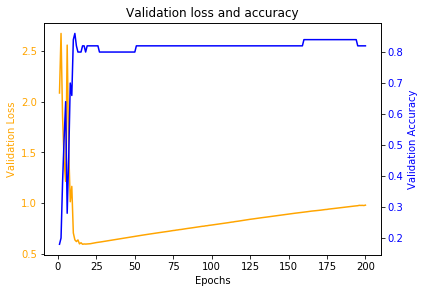

In [8]:
# Plot the validation loss and accuracy
nn_loss = nn_hist.history['val_loss']
nn_acc = nn_hist.history['val_acc']
epochs = range(1, len(nn_loss) + 1)

fig, ax1 = plt.subplots()
color = 'orange'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Validation Loss', color=color)
ax1.plot(epochs, nn_loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'b'
ax2.set_ylabel('Validation Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(epochs, nn_acc, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Validation loss and accuracy")
plt.show()

We can see from the plot that the model performance starts to degrade after 25 epochs or so.

### Implement dropout

In [9]:
nn_dropout = models.Sequential()
nn_dropout.add(layers.Dense(512, activation='relu', input_shape=(28**2,)))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(512, activation='relu'))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(512, activation='relu'))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(512, activation='relu'))
nn_dropout.add(layers.Dropout(0.5))
nn_dropout.add(layers.Dense(10, activation='softmax'))
nn_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
dropout_hist = nn_dropout.fit(train_imgs, train_labels, validation_data=(valid_imgs,valid_labels), 
                                   epochs=200, batch_size=512, verbose=0)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


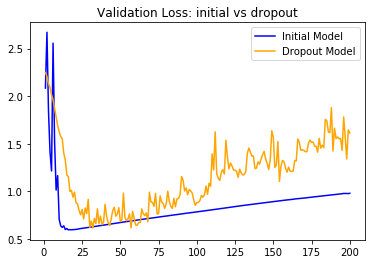

In [10]:
# Plot the validation loss and accuracy
dropout_loss = dropout_hist.history['val_loss']
dropout_acc = dropout_hist.history['val_acc']
epochs = range(1, len(dropout_loss) + 1)
plt.plot(epochs, nn_loss, color = 'b', label='Initial Model')
plt.plot(epochs, dropout_loss, color = 'orange', label='Dropout Model')
plt.legend()
plt.title("Validation Loss: initial vs dropout")
plt.show()

The new model's performance is slightly inferior to the initial one.

### Implement Weight Regularization

#### L1-Norm

In [11]:
nn_regu1 = models.Sequential()
nn_regu1.add(layers.Dense(512, activation='relu', input_shape=(28**2,), kernel_regularizer=regularizers.l1(0.001)))
nn_regu1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
nn_regu1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
nn_regu1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
nn_regu1.add(layers.Dense(10, activation='softmax'))
nn_regu1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
regu1_hist = nn_regu1.fit(train_imgs, train_labels, validation_data=(valid_imgs,valid_labels), 
                                   epochs=200, batch_size=512, verbose=0)

#### L2-Norm

In [12]:
nn_regu2 = models.Sequential()
nn_regu2.add(layers.Dense(512, activation='relu', input_shape=(28**2,), kernel_regularizer=regularizers.l2(0.001)))
nn_regu2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
nn_regu2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
nn_regu2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
nn_regu2.add(layers.Dense(10, activation='softmax'))
nn_regu2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
regu2_hist = nn_regu2.fit(train_imgs, train_labels, validation_data=(valid_imgs,valid_labels), 
                                   epochs=200, batch_size=512, verbose=0)

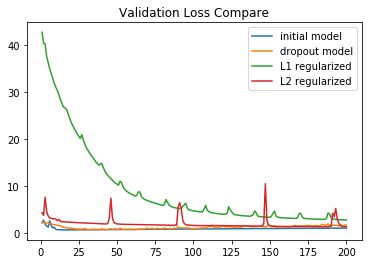

In [15]:
regu1_loss = regu1_hist.history['val_loss']
regu2_loss = regu2_hist.history['val_loss']
epochs = np.arange(1, len(regu1_loss)+1)
plt.plot(epochs, nn_loss, label = 'initial model')
plt.plot(epochs, dropout_loss, label = 'dropout model')
plt.plot(epochs, regu1_loss, label = 'L1 regularized')
plt.plot(epochs, regu2_loss, label = 'L2 regularized')
plt.legend()
plt.title('Validation Loss Compare')
plt.show()

The initial model seems to have the best performance out of the four model settings, in terms of validation loss.

### Evaluate alternative model settings

In [16]:
# I will try a series of models with different number of hidden units, various dropout rates)
hid_units = np.logspace(base = 2, start= 5, stop = 9, num= 5, dtype = np.int)
dropout_rates = np.arange(0.3, 0.6, step = 0.1)

In [17]:
init_losses = []
dropout_losses = []
for unit in hid_units:
    # initial model
    nn = models.Sequential()
    nn.add(layers.Dense(unit, activation='relu', input_shape=(28**2,)))
    nn.add(layers.Dense(unit, activation='relu'))
    nn.add(layers.Dense(unit, activation='relu'))
    nn.add(layers.Dense(unit, activation='relu'))
    nn.add(layers.Dense(10, activation='softmax'))
    nn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    nn_hist = nn.fit(train_imgs, train_labels, validation_data=(valid_imgs, valid_labels),
                epochs=200, batch_size=512, verbose=0)
    init_losses.append(nn_hist.history['val_loss'])
    dropout_loss_arr = []
    for r in dropout_rates:
        nn_dropout = models.Sequential()
        nn_dropout.add(layers.Dense(unit, activation='relu', input_shape=(28**2,)))
        nn_dropout.add(layers.Dropout(r))
        nn_dropout.add(layers.Dense(unit, activation='relu'))
        nn_dropout.add(layers.Dropout(r))
        nn_dropout.add(layers.Dense(unit, activation='relu'))
        nn_dropout.add(layers.Dropout(r))
        nn_dropout.add(layers.Dense(unit, activation='relu'))
        nn_dropout.add(layers.Dropout(r))
        nn_dropout.add(layers.Dense(10, activation='softmax'))
        nn_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
        dropout_hist = nn_dropout.fit(train_imgs, train_labels, validation_data=(valid_imgs,valid_labels), 
                                   epochs=200, batch_size=512, verbose=0)
        dropout_loss_arr.append(dropout_hist.history['val_loss'])
    dropout_losses.append(dropout_loss_arr)

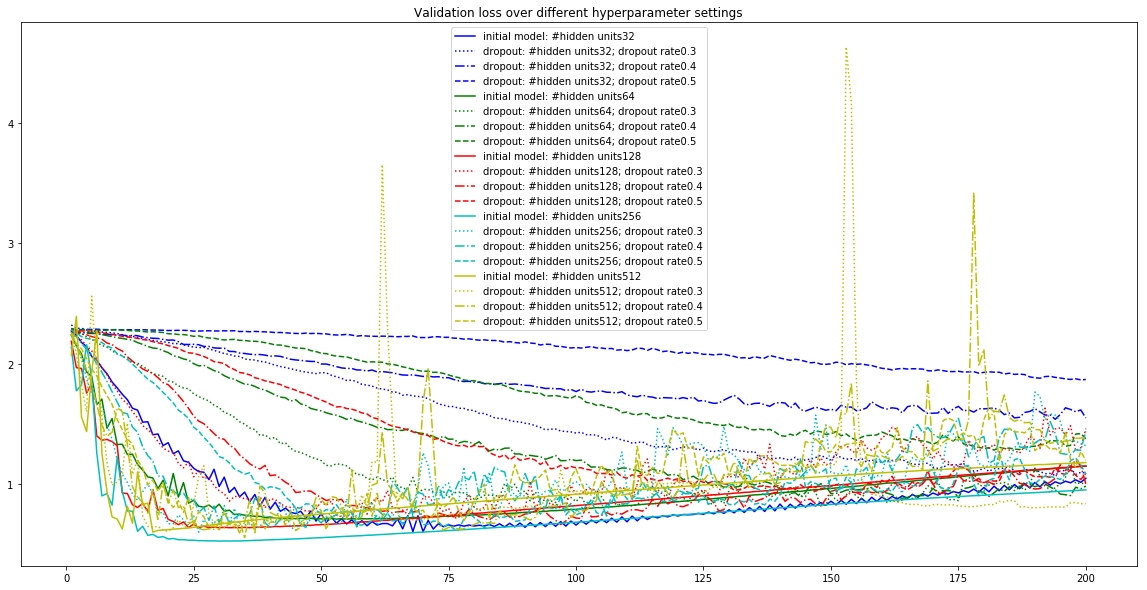

In [18]:
epochs = np.arange(1, 201)
linestyle = [':','-.','--']
color = ['b','g','r','c','y']
plt.figure(figsize=(20, 10))
for i in range(len(hid_units)):
    plt.plot(epochs, init_losses[i], color=color[i], label='initial model: #hidden units'+str(hid_units[i]))
    dropout_loss_arr = dropout_losses[i]
    for j in range(len(dropout_loss_arr)):
        plt.plot(epochs, dropout_loss_arr[j], color=color[i], linestyle=linestyle[j],
                 label='dropout: #hidden units'+str(hid_units[i]) + "; dropout rate" + str(dropout_rates[j]))

plt.legend()
plt.title("Validation loss over different hyperparameter settings")
plt.show()